In [28]:
import numpy as np
import matplotlib.pylab as plt

In [29]:
DARK_CURRENT = 0.15 #e/p/s
READ_NOISE = 9.3 #e

In [31]:
data = {
    "star1":{
        "exposure_time": [10,20,30,40,50,60,70,80,90,100,150,180,210,270,400,500,600], #s
        "n_pixel":       [96,95,97,95,96,90,96,97,96,95,94,96,96,95,97,95,93],
        "S_source":     [1133.91,1332.47,1560.87,1779.71,1964.09,2240.23,2424.95,2642.34,2838.33,2318.26,3221.69,3913.39,5445.92,6285.23,8717.63,                        11356.4,14140], #ADU
        "n_pixel_Sky":  [483,480,471,479,481,474,476,480,472,479,475,471,468,474,473,477,472],
        "S_sky":        [1070.02,1205.02,1354.79,1506.83,1627.6,1808.76,1952.97,2088.57,2220.73,1581.09,2143.86,2720.42,4661.21,4668.74,6046.99,                           7909.27,10000.1] #ADU
    },
    "star2":{
        "exposure_time": [10,20,30,40,50,60,70,80,90,100,150,180,210,270,400,500,600], #s
        "n_pixel":       [113,112,112,111,108,115,113,112,115,111,113,113,113,113,114,112,111],
        "S_source":     [1188.51,1416.35,1671.07,1901.81,2133.46,2369.35,2624.88,2853.11,3061.83,2584.86,3577,4261.97,5579.79,6899.05,9664.76,                           12357.1,15577.5], #ADU
        "n_pixel_Sky":  [567,562,567,566,567,564,565,564,563,570,563,566,564,566,566,567,565],
        "S_sky":        [1088.62,1225.4,1369.73,1515.33,1637.41,1803.49,1935.25,2077.92,2201.68,1582.14,2110.09,2594.16,4372.15,4875.7,5935.36,                          7631.55,10049.8] #ADU
    },
        "star3":{
        "exposure_time": [10,20,30,40,50,60,70,80,90,100,150,180,210,270,400,500,600], #s
        "n_pixel":       [95,97,95,97,96,96,95,96,96,95,94,95,96,95,96,95,95],
        "S_source":     [1171.75,1394.1,1631.79,1852.08,2075.59,2338.34,2587.78,2785.73,2993.48,2496.44,3503.3,4204.36,5600.44,6751.57,9411.97,                          12087.3,15190.2], #ADU
        "n_pixel_Sky":  [472,480,477,480,469,474,472,471,469,477,477,472,477,478,456,480,473],
        "S_sky":        [1088.23,1226.86,1376.6,1526.67,1649.74,1827.85,1972.53,2106.27,2230.88,1609.19,2175.83,2678.68,4499.24,4850.72,6091.4,                           7864.83,10374.1] #ADU
    }
}

In [32]:
class Star:
    def __init__(self, exposure_time=None, n_pixel=None, S_source=None, n_pixel_sky=None, S_sky=None):
        self.exposure_time = exposure_time
        self.n_pixel = n_pixel 
        self.S_source = S_source
        self.n_pixel_sky = n_pixel_sky
        self.S_sky = S_sky
        self.name = ""

    def SNR(self):
        return self.S_source/np.sqrt(self.S_source + self.n_pixel*(1+(self.n_pixel/self.n_pixel_sky))*(self.S_sky + self.exposure_time*DARK_CURRENT + READ_NOISE**2))


class StarData():
    def __init__(self, name=""):
        self.name = name
        self.starInTime = []
        self.star = Star()

    def load(self, data):
        star_data =  data.get(self.name)
        for exposure_time, n_pixel, S_source, n_pixel_sky, S_sky in zip(star_data["exposure_time"], 
                                                                        star_data["n_pixel"], 
                                                                        star_data["S_source"], 
                                                                        star_data["n_pixel_Sky"], 
                                                                        star_data["S_sky"]):
            self.star = Star(exposure_time, n_pixel, S_source, n_pixel_sky, S_sky)
            self.starInTime.append(self.star)

In [34]:
SNR_dict = {}
for star_name in data.keys():
    starData = StarData(star_name)
    starData.load(data)
    list_of_snr = [ star.SNR() for star in  starData.starInTime]
    SNR_dict[star_name] = list_of_snr

In [35]:
SNR = np.mean((SNR_dict["star1"],SNR_dict["star2"],SNR_dict["star3"]), axis=0)

In [37]:
SNR

array([ 3.08089451,  3.45170659,  3.83630756,  4.1634753 ,  4.49602935,
        4.8235249 ,  5.0779116 ,  5.31574731,  5.52799768,  5.44110115,
        6.56647422,  7.0638165 ,  7.34676378,  8.56676926, 10.56549517,
       12.11715062, 13.41757821])

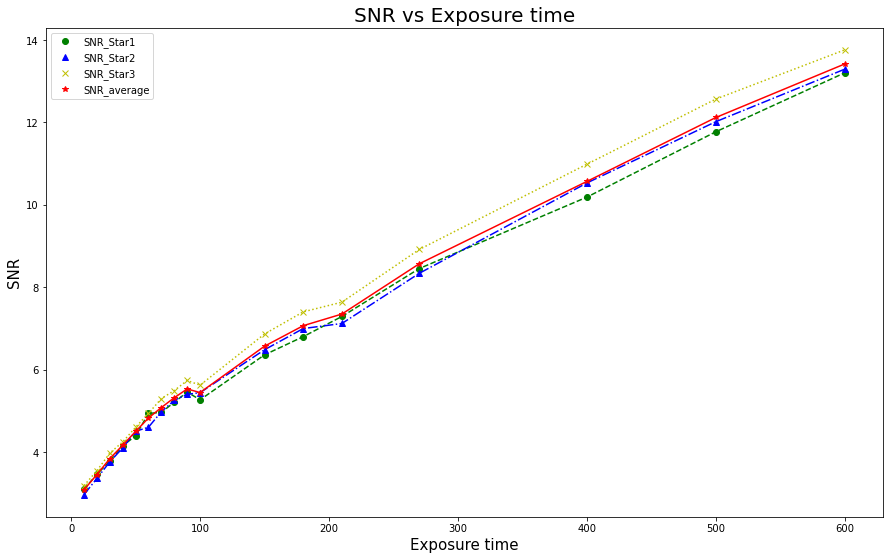

In [43]:
plt.figure(figsize = (15,9))
exposure_time = data["star1"]["exposure_time"]
plt.plot(exposure_time, SNR_dict["star1"], 'go', label='SNR_Star1')
plt.plot(exposure_time, SNR_dict["star1"], 'g--')
plt.plot(exposure_time, SNR_dict["star2"], 'b^', label='SNR_Star2')
plt.plot(exposure_time, SNR_dict["star2"], 'b-.')
plt.plot(exposure_time, SNR_dict["star3"], 'yx', label='SNR_Star3')
plt.plot(exposure_time, SNR_dict["star3"], 'y:')
plt.plot(exposure_time, SNR, 'r*', label='SNR_average')
plt.plot(exposure_time, SNR, 'r-')
plt.title('SNR vs Exposure time', fontsize=20)
plt.xlabel('Exposure time', fontsize=15)
plt.ylabel('SNR', fontsize=15)
plt.legend()

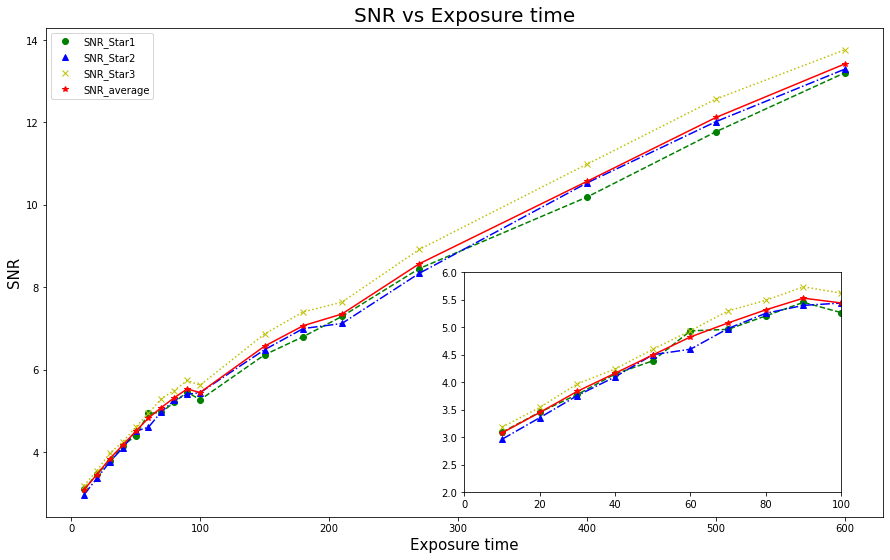

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

fig, ax1 = plt.subplots(figsize=(15,9))
plt.plot(exposure_time, SNR_dict["star1"], 'go', label='SNR_Star1')
plt.plot(exposure_time, SNR_dict["star1"], 'g--')
plt.plot(exposure_time, SNR_dict["star2"], 'b^', label='SNR_Star2')
plt.plot(exposure_time, SNR_dict["star2"], 'b-.')
plt.plot(exposure_time, SNR_dict["star3"], 'yx', label='SNR_Star3')
plt.plot(exposure_time, SNR_dict["star3"], 'y:')
plt.plot(exposure_time, SNR, 'r*', label='SNR_average')
plt.plot(exposure_time, SNR, 'r-')
ax1.set_title('SNR vs Exposure time', fontsize=20)
ax1.set_xlabel('Exposure time', fontsize=15)
ax1.set_ylabel('SNR',fontsize=15)
ax1.legend(loc=2)

# Create a set of inset Axes: these should fill the bounding box allocated to
# them.
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.5,0.05,0.45,0.45])
ax2.set_axes_locator(ip)


plt.plot(exposure_time, SNR_dict["star1"], 'go', label='SNR_Star1')
plt.plot(exposure_time, SNR_dict["star1"], 'g--')
plt.plot(exposure_time, SNR_dict["star2"], 'b^', label='SNR_Star2')
plt.plot(exposure_time, SNR_dict["star2"], 'b-.')
plt.plot(exposure_time, SNR_dict["star3"], 'yx', label='SNR_Star3')
plt.plot(exposure_time, SNR_dict["star3"], 'y:')
plt.plot(exposure_time, SNR, 'r*', label='SNR_average')
plt.plot(exposure_time, SNR, 'r-')
ax2.set_xlim(0,100)
ax2.set_ylim(2,6)

plt.show()